In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mortality_rate = pd.read_csv("../data/mortality_rate_by_US_state.csv")
temperature_rate = pd.read_csv("../data/model_state.csv")

In [6]:
cancer_rate = mortality_rate.loc[mortality_rate["Cause Name"]=="Cancer"]
cancer_rate = cancer_rate.rename(columns={"Year":"year"})
cancer_rate

,year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1923,2016,Malignant neoplasms (C00-C97),Cancer,Alabama,10419,174.0
1924,2015,Malignant neoplasms (C00-C97),Cancer,Alabama,10354,175.6
1925,2014,Malignant neoplasms (C00-C97),Cancer,Alabama,10286,177.6
1926,2013,Malignant neoplasms (C00-C97),Cancer,Alabama,10328,182.2
1927,2012,Malignant neoplasms (C00-C97),Cancer,Alabama,10276,185.2
...,...,...,...,...,...,...
2854,2003,Malignant neoplasms (C00-C97),Cancer,Wyoming,943,188.9
2855,2002,Malignant neoplasms (C00-C97),Cancer,Wyoming,859,177.1
2856,2001,Malignant neoplasms (C00-C97),Cancer,Wyoming,923,194.0
2857,2000,Malignant neoplasms (C00-C97),Cancer,Wyoming,868,185.5


In [7]:
cancer_df = cancer_rate.loc[(cancer_rate["year"]>1999) & (cancer_rate["State"]=="California")]
cancer_df

,year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1995,2016,Malignant neoplasms (C00-C97),Cancer,California,59515,139.7
1996,2015,Malignant neoplasms (C00-C97),Cancer,California,59629,142.8
1997,2014,Malignant neoplasms (C00-C97),Cancer,California,58412,144.1
1998,2013,Malignant neoplasms (C00-C97),Cancer,California,57714,147.0
1999,2012,Malignant neoplasms (C00-C97),Cancer,California,57676,150.9
2000,2011,Malignant neoplasms (C00-C97),Cancer,California,56449,152.0
2001,2010,Malignant neoplasms (C00-C97),Cancer,California,56453,156.9
2002,2009,Malignant neoplasms (C00-C97),Cancer,California,55991,158.8
2003,2008,Malignant neoplasms (C00-C97),Cancer,California,54686,158.8
2004,2007,Malignant neoplasms (C00-C97),Cancer,California,55011,163.8


In [8]:
climate_change = pd.read_csv("../data/climdiv_state_year.csv")
climate_df =climate_change.loc[(climate_change["year"]>1999) & (climate_change["year"]<2017) & (climate_change["fips"]==6)]
climate_df

,fips,year,temp,tempc
480,6,2000,58.800000,14.888889
481,6,2001,59.116667,15.064815
482,6,2002,58.850000,14.916667
483,6,2003,59.425000,15.236111
484,6,2004,58.858333,14.921296
485,6,2005,58.600000,14.777778
486,6,2006,58.641667,14.800926
487,6,2007,58.925000,14.958333
488,6,2008,58.916667,14.953704
489,6,2009,58.833333,14.907407


In [18]:
whole_data = cancer_df.merge(climate_df , how= 'outer', on="year" )
yearly_cancer= whole_data.groupby(whole_data["year"]).sum(["Deaths"])
temperature_yearly = whole_data.groupby(whole_data["year"]).mean(["tempc"])
yearly_cancer_deaths= yearly_cancer[["Deaths"]]
temperature_yearly_change = temperature_yearly[["tempc"]]
annual_change = temperature_yearly_change.merge(yearly_cancer_deaths, on="year")
annual_change

,tempc,Deaths
year,,
2000,14.888889,53158
2001,15.064815,53924
2002,14.916667,54143
2003,15.236111,54319
2004,14.921296,53700
2005,14.777778,54732
2006,14.800926,54140
2007,14.958333,55011
2008,14.953704,54686


In [35]:
#annual_change.plot(kind = "bar", y="temp",figsize = (10,6), color="r")
#annual_change.plot(kind = "line", y = "Deaths")
#plt.show()

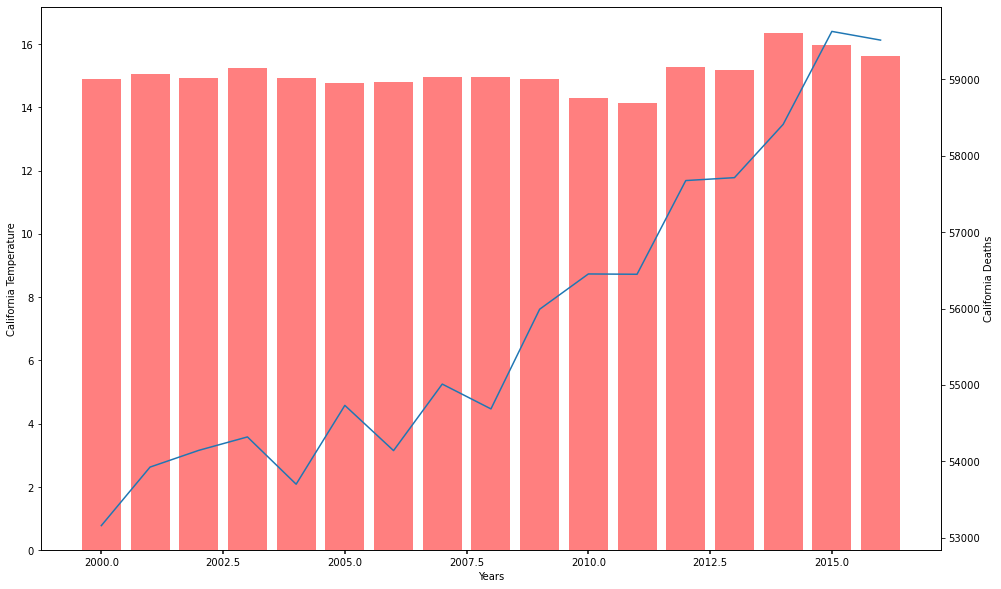

In [17]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
fig.set_figheight(10)
fig.set_figwidth(20)
twin1 = ax.twinx()


ax.bar(annual_change.index, annual_change["tempc"], color="r", label="Temperature",alpha=0.5 )
#print(p1)
twin1.plot(annual_change.index, annual_change["Deaths"], label="Deaths")


ax.set_xlabel("Years")
ax.set_ylabel("California Temperature")
twin1.set_ylabel("California Deaths")

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='x', **tkw)

plt.savefig("../images/california.png")
plt.show()
